In [ ]:
'''
【课程1.6】  正太性检验

利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

       value
0   9.677824
1  11.285020
2   9.046597
3  11.048112
4   9.658381


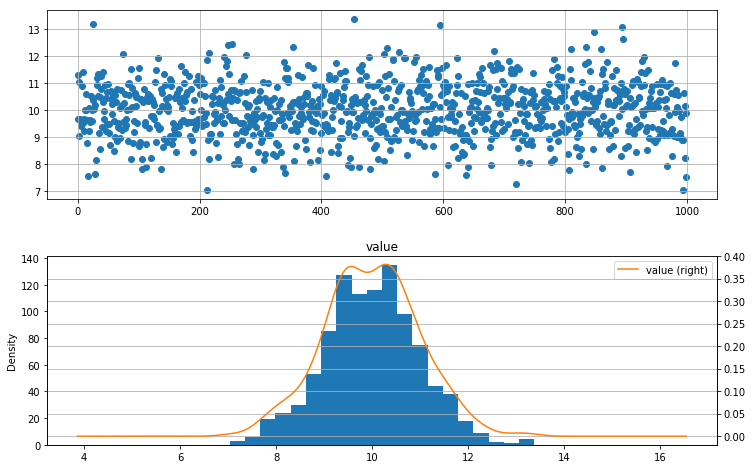

In [17]:
# 直方图的判断

s = pd.DataFrame(np.random.randn(1000)+10, columns=['value'])
print(s.head())

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index, s.value)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
s.hist(bins = 20, ax = ax2)
s.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

In [22]:
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
# print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace=True)
s_r = s.reset_index(drop = False)   # drop意思是：是否保留之前index的排序
s_r['p'] = (s_r.index - 0.5) / len(s_r)
s_r

均值为：9.95，标准差为：0.99
------


,index,value,p
0,998,6.813517,-0.0005
1,86,6.865818,0.0005
2,761,7.433522,0.0015
3,140,7.498437,0.0025
4,130,7.726868,0.0035
5,880,7.750010,0.0045
6,631,7.752421,0.0055
7,476,7.753693,0.0065
8,104,7.825309,0.0075
9,767,7.898532,0.0085
